<a href="https://colab.research.google.com/github/AndreaBravo52/AlgoritmosClasificacion/blob/main/ArbolDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Andrea Bravo

A01028579

5 de Abril, 2022

# Árbol en Python

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn import preprocessing
from sklearn import tree
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Solución para datos de Tráfico

In [ ]:
def getWeather():
    return ['Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear',
            'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Rainy',
            'Snowy', 'Snowy', 'Snowy', 'Snowy', 'Snowy', 'Snowy']

def getTimeOfWeek():
    return ['Workday', 'Workday', 'Workday',
            'Weekend', 'Weekend', 'Weekend',
            'Workday', 'Workday', 'Workday',
            'Weekend', 'Weekend', 'Weekend',
            'Workday', 'Workday', 'Workday',
            'Weekend', 'Weekend', 'Weekend']

def getTimeOfDay():
    return ['Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            'Morning', 'Lunch', 'Evening',
            ]

def getTrafficJam():
    return ['Yes', 'No', 'Yes',
            'No', 'No', 'No',
            'Yes', 'Yes', 'Yes',
            'No', 'No', 'No',
            'Yes', 'Yes', 'Yes',
            'Yes', 'No', 'Yes'
            ]

In [ ]:
weather = ['Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear',
            'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Rainy',
            'Snowy', 'Snowy', 'Snowy', 'Snowy', 'Snowy', 'Snowy']
labelEncoder = preprocessing.LabelEncoder();

trafficJam = ['Yes', 'No', 'Yes',
            'No', 'No', 'No',
            'Yes', 'Yes', 'Yes',
            'No', 'No', 'No',
            'Yes', 'Yes', 'Yes',
            'Yes', 'No', 'Yes'
            ]

    # Get the data
weather = getWeather()
timeOfWeek = getTimeOfWeek()
timeOfDay = getTimeOfDay()
trafficJam = getTrafficJam()

labelEncoder = preprocessing.LabelEncoder()

    # Encode the features and the labels
encodedWeather = labelEncoder.fit_transform(weather)
encodedTimeOfWeek = labelEncoder.fit_transform(timeOfWeek)
encodedTimeOfDay = labelEncoder.fit_transform(timeOfDay)
encodedTrafficJam = labelEncoder.fit_transform(trafficJam)

    # Build the features
features = []
for i in range(len(encodedWeather)):
  features.append([encodedWeather[i], encodedTimeOfWeek[i], encodedTimeOfDay[i]])

classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(features, encodedTrafficJam)

Soluciones mostradas en el ejemplo

In [ ]:
print(classifier.predict([[2, 1, 2]]))
print(classifier.predict([[0, 0, 1]]))

[1]
[0]


1 dice que si va a haber tráfico

0 indica que no habrá ttráfico

In [ ]:
print(classifier.predict([[0, 0, 0]]))
print(classifier.predict([[2, 1, 1]]))
print(classifier.predict([[1, 2, 0]]))

[0]
[1]
[1]


No va a haber tráfico

Si habrá tráfico

Si habrá tráfico

In [ ]:
feature_names=['Weather','Time of Week','Time of Day']
target_names = ['Yes', 'No']
    # Build the daya
dot_data = tree.export_graphviz(classifier, out_file=None,
                                    feature_names=feature_names,
                                    class_names=target_names)
    # Build the graph
graph = pydotplus.graph_from_dot_data(dot_data)

    # Show the image
Image(graph.create_png())
graph.write_png("drive/MyDrive/treeTJ.png")

True

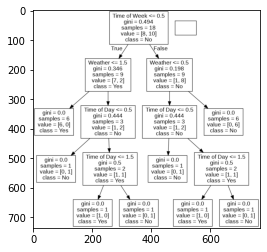

In [ ]:
img = mpimg.imread("drive/MyDrive/treeTJ.png")
imgplot = plt.imshow(img)
plt.show()

## Solución para base de datos de Iris

In [ ]:
iris=pd.read_csv('drive/MyDrive/iris.csv')

In [ ]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
specie_en=iris['Species']
specie_en

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [ ]:
    labelEncoder = preprocessing.LabelEncoder()
    encodedSpecies = labelEncoder.fit_transform(specie_en)
    print (encodedSpecies)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
feature=iris.drop('Species', axis=1)

In [ ]:
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(feature, encodedSpecies)

Resultado de 5 predicciones

In [ ]:
#Ejemplo de clasificación
print(classifier.predict([[5.0, 3.6, 1.4, 0.2]]))
print(classifier.predict([[6.7, 3.0, 5.2, 2.3]]))
print(classifier.predict([[5.9, 3.0, 5.1, 1.8]]))
print(classifier.predict([[5.1, 3.5, 1.4, 0.2]]))
print(classifier.predict([[5.7,	2.6, 3.5,	1.0	]]))

[0]
[2]
[2]
[0]
[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with

Las clasificaciones obtenidas nos indican que con esas carácterísticas las flores serían de las especies setosa, virginica, virginica, setosa y versicolor.

In [ ]:
feature_names=['Sepal.Length','Sepal.Width','Petal.Length', 'Petal.Width']
target_names = iris['Species'].unique()
    # Build the daya
dot_data = tree.export_graphviz(classifier, out_file=None,
                                    feature_names=feature_names,
                                    class_names=target_names)
    # Build the graph
graph = pydotplus.graph_from_dot_data(dot_data)

    # Show the image
Image(graph.create_png())
graph.write_png("drive/MyDrive/treeI.png")

True

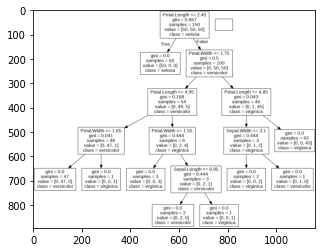

In [ ]:

img = mpimg.imread("drive/MyDrive/treeI.png")
imgplot = plt.imshow(img)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, encodedSpecies, test_size=0.3, random_state=1)

In [ ]:
classifier = classifier.fit(X_train, y_train)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556
